In [58]:
# code for ignore any warning messages
import warnings
warnings.filterwarnings('ignore')

In [59]:
# import the libraries and requrie modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# import the data from the dataset
SMPP = pd.read_csv("NSE_TATA.csv")
SMPP = SMPP.dropna()

# define columns in the dataset
SMPP = SMPP[['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity','Turnover (Lacs)']] 

# code to get first 5 rows
SMPP.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2022-04-22,818.0,821.60,803.10,811.60,815.60,1880668,15288.05349
1,2022-04-21,812.0,822.00,804.25,818.95,820.05,1344250,10958.17570
2,2022-04-20,800.0,813.45,792.10,810.10,810.45,1522453,12244.14776
3,2022-04-19,825.0,836.85,784.85,788.00,791.35,2460482,20063.01436
4,2022-04-18,816.2,824.90,809.00,822.50,822.30,1480954,12102.61050


In [61]:
# get the summary statistics of the numerical columns in the dataset
SMPP.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1561.000000,1561.000000,1561.00000,1561.000000,1561.000000,1.561000e+03,1561.000000
mean,348.303972,353.312460,343.06230,348.047341,348.034177,3.187189e+06,11480.285301
std,222.923844,225.242387,219.99598,222.566091,222.600846,3.349989e+06,14159.640225
min,103.000000,104.600000,100.00000,102.600000,102.650000,1.758370e+05,388.735415
25%,171.800000,173.850000,169.00000,171.000000,171.150000,1.518494e+06,3202.778609
50%,265.950000,271.250000,262.00000,266.200000,266.600000,2.329094e+06,7762.714725
75%,511.000000,517.850000,502.10000,508.600000,509.100000,3.662455e+06,15107.108290
max,885.000000,889.000000,877.60000,880.200000,882.100000,6.355260e+07,234317.687900


In [62]:
#get the  information about pandas dataset
SMPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1561 non-null   object 
 1   Open                  1561 non-null   float64
 2   High                  1561 non-null   float64
 3   Low                   1561 non-null   float64
 4   Last                  1561 non-null   float64
 5   Close                 1561 non-null   float64
 6   Total Trade Quantity  1561 non-null   int64  
 7   Turnover (Lacs)       1561 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 97.7+ KB


In [63]:
SMPP.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1561.000000,1561.000000,1561.00000,1561.000000,1561.000000,1.561000e+03,1561.000000
mean,348.303972,353.312460,343.06230,348.047341,348.034177,3.187189e+06,11480.285301
std,222.923844,225.242387,219.99598,222.566091,222.600846,3.349989e+06,14159.640225
min,103.000000,104.600000,100.00000,102.600000,102.650000,1.758370e+05,388.735415
25%,171.800000,173.850000,169.00000,171.000000,171.150000,1.518494e+06,3202.778609
50%,265.950000,271.250000,262.00000,266.200000,266.600000,2.329094e+06,7762.714725
75%,511.000000,517.850000,502.10000,508.600000,509.100000,3.662455e+06,15107.108290
max,885.000000,889.000000,877.60000,880.200000,882.100000,6.355260e+07,234317.687900


In [64]:
#import and set up Plotly, a data visualization library, for use in a Jupyter notebook environment.
import plotly.graph_objs as go
import plotly.io as pio

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [86]:
# code to define a layout and create a line chart with the SMPP stock prices on the y-axis and dates on the x-axis
layout = go.Layout(
    title='SMPP STOCK PRICE PREDICTION',
        xaxis=dict(
            title='Date',
            titlefont=dict(
                family='Times New Roman',
                size=23,
                color='red'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Times New Roman',
                size=23,
                color='green'
        )
    )
)
SMPP_DATA = [{'x':SMPP['Date'], 'y':SMPP['Close']}]
plot = go.Figure(data=SMPP_DATA, layout=layout)

In [111]:
# code to display the interactive plot created using Plotly 
iplot(plot)

In [68]:
# code to calculate the differences between the opening and closing prices of the SMPP stock
SMPP['Open-Close']= SMPP.Close - SMPP.Open

#code to calculate the differences between the high and low prices of the SMPP stock
SMPP['High-Low']  = SMPP.High - SMPP.Low
SMPP = SMPP.dropna()

# define the input features
X= SMPP[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-2.40,18.50
1,8.05,17.75
2,10.45,21.35
3,-33.65,52.00
4,6.10,15.90


In [91]:
#code creates a binary target variable 'B' where it assigns 1 if the next day's closing price is higher than the current day's closing price and -1 if it is lower.
B = np.where(SMPP['Close'].shift(-1)>SMPP['Close'],1,-1)

In [98]:
# splitting the data into training and testing sets based on a given percentage 0.7 .
split_percentage = 0.7
split = int(split_percentage*len(SMPP))

X_train = X[:split]
B_train = B[:split]

X_test = X[split:]
B_test = B[split:]

In [94]:
#Importing necessary modules for logistic regression and model evaluation using cross-validation.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [99]:
# examine the coefficients
model = LogisticRegression()
model = model.fit (X_train,B_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open-Close,[-0.546785145285855]
1,High-Low,[-0.01089565974160248]


In [100]:
# calculate class probabilities
probability = model.predict_proba(X_test)
print(probability)

[[6.70742177e-01 3.29257823e-01]
 [2.54168217e-01 7.45831783e-01]
 [9.99673280e-01 3.26720403e-04]
 [9.90189276e-01 9.81072427e-03]
 [3.28014306e-01 6.71985694e-01]
 [9.99499350e-01 5.00650322e-04]
 [9.99173541e-01 8.26458770e-04]
 [3.45108686e-01 6.54891314e-01]
 [1.12701278e-01 8.87298722e-01]
 [9.99798709e-01 2.01290787e-04]
 [3.92160584e-01 6.07839416e-01]
 [6.75579415e-03 9.93244206e-01]
 [9.97045908e-01 2.95409200e-03]
 [3.61629622e-01 6.38370378e-01]
 [3.91877037e-01 6.08122963e-01]
 [6.98959398e-01 3.01040602e-01]
 [5.93420776e-01 4.06579224e-01]
 [8.00785610e-01 1.99214390e-01]
 [9.95865612e-01 4.13438767e-03]
 [9.55025298e-01 4.49747022e-02]
 [6.28845980e-02 9.37115402e-01]
 [9.70254889e-01 2.97451105e-02]
 [2.81530322e-01 7.18469678e-01]
 [1.92238916e-01 8.07761084e-01]
 [1.03748230e-01 8.96251770e-01]
 [5.78039348e-01 4.21960652e-01]
 [4.97890471e-01 5.02109529e-01]
 [4.91601217e-01 5.08398783e-01]
 [7.15598225e-01 2.84401775e-01]
 [6.00735985e-01 3.99264015e-01]
 [4.467088

In [101]:
# predict class labels
predicted = model.predict(X_test)

In [102]:
# confusion matrix
print(metrics.confusion_matrix(B_test, predicted))

[[224  23]
 [ 36 186]]


In [103]:
# generate the classification report
print(metrics.classification_report(B_test, predicted))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88       247
           1       0.89      0.84      0.86       222

    accuracy                           0.87       469
   macro avg       0.88      0.87      0.87       469
weighted avg       0.87      0.87      0.87       469



In [105]:
print(model.score(X_test,B_test))

0.8742004264392325


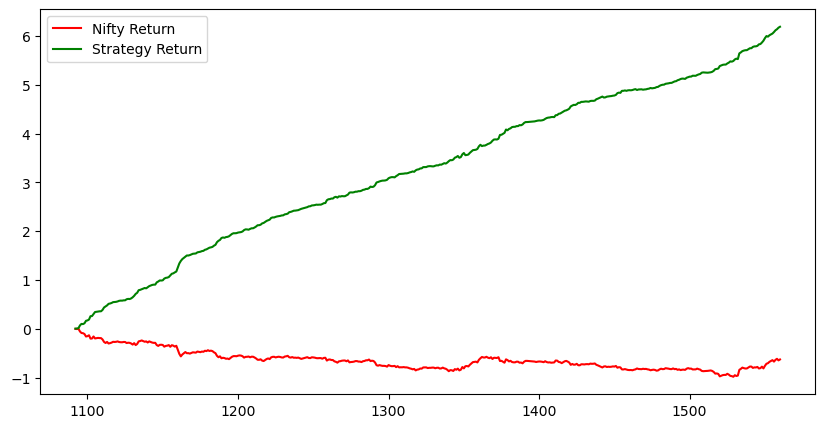

In [110]:
# code plots the cumulative returns of Nifty and a trading strategy based on predicted signals
SMPP['Predicted_Signal'] = model.predict(X)
SMPP['Nifty_return'] = np.log(SMPP['Close']/SMPP['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(SMPP[split:]['Nifty_return'])

SMPP['Startegy_return'] = SMPP['Nifty_return']* SMPP['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(SMPP[split:]['Startegy_return'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Return')
plt.legend()
plt.show()

In [108]:
# model accuracy
print('Accuracy of SMPP-Stock-Market-Prediction using Logistic Regression ',model.score(X_test,B_test))

Accuracy of SMPP-Stock-Market-Prediction using Logistic Regression  0.8742004264392325


In [109]:
# cross-validation
cross_val = cross_val_score(LogisticRegression(), X, B, scoring='accuracy', cv=100)

# find the model accuracy after cross validation
print('Accuracy of SMPP-Stock-Market-Prediction after Cross_validation')
print(cross_val)
print(cross_val.mean())

Accuracy of SMPP-Stock-Market-Prediction after Cross_validation
[0.9375     0.875      0.75       0.875      0.8125     0.875
 0.9375     0.875      0.75       0.875      0.9375     0.875
 0.875      0.9375     0.9375     1.         0.9375     0.9375
 0.875      0.8125     0.75       0.875      0.875      0.8125
 0.875      0.6875     0.8125     0.8125     0.9375     0.8125
 1.         0.875      0.9375     0.875      0.9375     0.8125
 0.9375     0.875      0.9375     0.8125     0.9375     0.9375
 0.8125     0.875      0.8125     0.875      1.         0.8125
 0.9375     0.9375     0.9375     0.8125     0.9375     0.75
 0.8125     0.9375     0.9375     1.         0.8125     0.8125
 0.9375     0.93333333 0.73333333 0.86666667 0.73333333 0.86666667
 0.93333333 0.93333333 0.86666667 0.93333333 1.         0.8
 1.         0.93333333 1.         0.8        0.86666667 1.
 1.         0.8        0.66666667 0.8        0.93333333 0.93333333
 0.8        0.8        0.86666667 0.86666667 0.93333333 0